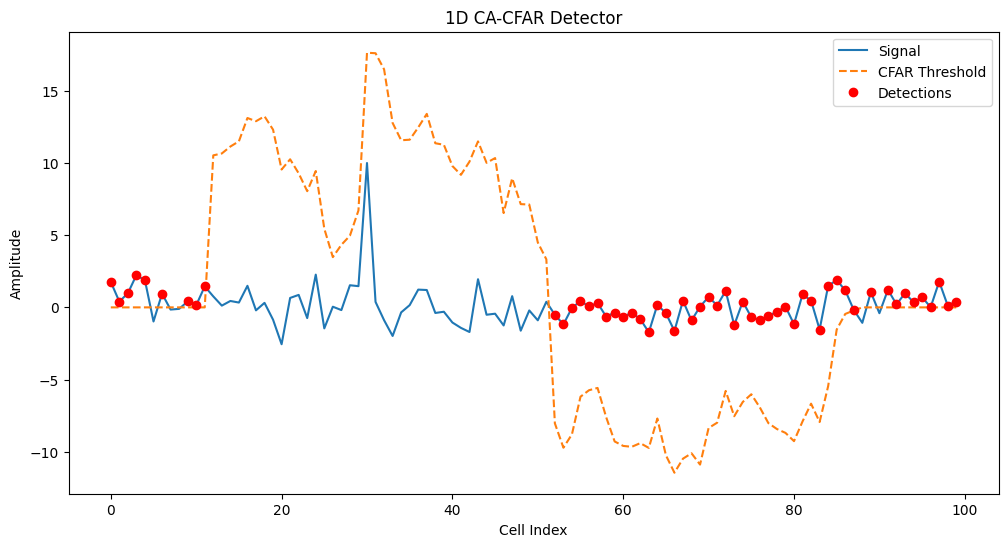

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def ca_cfar(signal, num_guard_cells, num_training_cells, false_alarm_rate):
    """
    Implements a 1D CA-CFAR detector.
    
    Parameters:
    - signal (np.array): The input signal array.
    - num_guard_cells (int): Number of guard cells on each side of the cell under test.
    - num_training_cells (int): Number of training cells on each side of the cell under test.
    - false_alarm_rate (float): Desired false alarm rate.
    
    Returns:
    - threshold (np.array): The calculated CFAR threshold for each cell.
    - detections (np.array): Boolean array indicating detected targets.
    """
    
    # Total window size (guard cells + training cells on both sides)
    window_size = 2 * (num_training_cells + num_guard_cells) + 1

    # Pad the signal to handle edge cases
    padded_signal = np.pad(signal, (num_training_cells + num_guard_cells, num_training_cells + num_guard_cells), mode='constant', constant_values=(0, 0))

    # Create an array to hold the rolling window sums
    rolling_sums = np.convolve(padded_signal, np.ones(window_size, dtype=int), 'valid')

    # Correct length for rolling_sums
    valid_length = len(signal) - 2 * (num_training_cells + num_guard_cells)
    rolling_sums = rolling_sums[:valid_length]

    # Subtract the guard cells and the cell under test
    guard_plus_one = num_guard_cells + 1
    guard_sums = np.convolve(padded_signal, np.ones(guard_plus_one, dtype=int), 'valid')
    guard_sums = guard_sums[:valid_length]

    rolling_sums -= guard_sums

    # Calculate the threshold for each cell
    alpha = num_training_cells * (false_alarm_rate ** (-1 / num_training_cells) - 1)
    threshold = alpha * (rolling_sums / (2 * num_training_cells))

    # Adjust threshold array to be the same length as signal
    threshold = np.pad(threshold, (num_training_cells + num_guard_cells, num_training_cells + num_guard_cells), mode='constant', constant_values=(0, 0))

    # Identify detections
    detections = signal > threshold
    
    return threshold, detections

def plot_cfar(signal, threshold, detections):
    """
    Plots the signal, CFAR threshold, and detections.
    
    Parameters:
    - signal (np.array): The input signal array.
    - threshold (np.array): The calculated CFAR threshold for each cell.
    - detections (np.array): Boolean array indicating detected targets.
    """
    
    plt.figure(figsize=(12, 6))
    plt.plot(signal, label='Signal')
    plt.plot(threshold, label='CFAR Threshold', linestyle='--')
    plt.plot(np.arange(len(signal))[detections], signal[detections], 'ro', label='Detections')
    plt.xlabel('Cell Index')
    plt.ylabel('Amplitude')
    plt.title('1D CA-CFAR Detector')
    plt.legend()
    plt.show()

# Example usage
np.random.seed(0)
num_cells = 100
signal = np.random.normal(0, 1, num_cells)
signal[30] = 10

num_guard_cells = 2
num_training_cells = 10
false_alarm_rate = 1e-5

threshold, detections = ca_cfar(signal, num_guard_cells, num_training_cells, false_alarm_rate)
plot_cfar(signal, threshold, detections)